Missing values:
 production_capacity_per_hour     0
num_heads_or_modules             0
avg_operational_hours_per_day    0
machine_price                    0
dtype: int64
Mean Squared Error: 2806426667.247852
R-squared Score: 0.6341189942328374


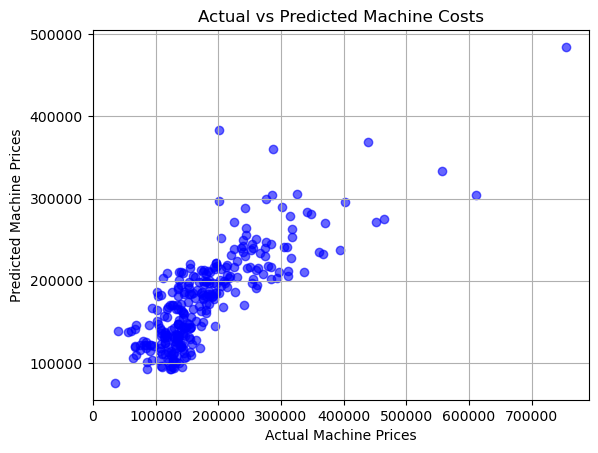

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the machine dataset
df = pd.read_csv("train_machine.csv")  # use the updated CSV

# Select relevant features
df = df[['production_capacity_per_hour', 'num_heads_or_modules', 
         'avg_operational_hours_per_day', 'machine_price']]

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Features and target
X = df[['production_capacity_per_hour', 'num_heads_or_modules', 
        'avg_operational_hours_per_day']]
y = df['machine_price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted Machine Prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Machine Prices")
plt.ylabel("Predicted Machine Prices")
plt.title("Actual vs Predicted Machine Costs")
plt.grid(True)
plt.show()
